In [7]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
from numpy import savetxt
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [8]:
db = load_digits()
X = db.data
y = db.target
print("Shape X : ",X.shape)
print("Shape y : ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

Shape X :  (1797, 64)
Shape y :  (1797,)


In [9]:

# # Create a new MLflow Experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080/")
time.sleep(15)
experiment_id = "v2_logging_api1"
print("experiment_id : ",experiment_id)
mlflow.set_experiment(experiment_id)


experiment_id :  v2_logging_api1


<Experiment: artifact_location='mlflow-artifacts:/531496527322224193', creation_time=1759638212926, experiment_id='531496527322224193', last_update_time=1759638212926, lifecycle_stage='active', name='v2_logging_api1', tags={}>

### MLflow AutoLog testing

In [10]:
# Mlflow autolog
mlflow.sklearn.autolog()

# for GPU info please install this
# pip install pynvml

mlflow.enable_system_metrics_logging()


## Logging custom parameters and artifacts store 

2025/10/05 11:29:20 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/10/05 11:29:20 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2025/10/05 11:29:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/05 11:29:40 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/10/05 11:29:40 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


🏃 View run wise-fish-666 at: http://127.0.0.1:8080/#/experiments/531496527322224193/runs/5519df78e089415d925dbd094d20aa52
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/531496527322224193


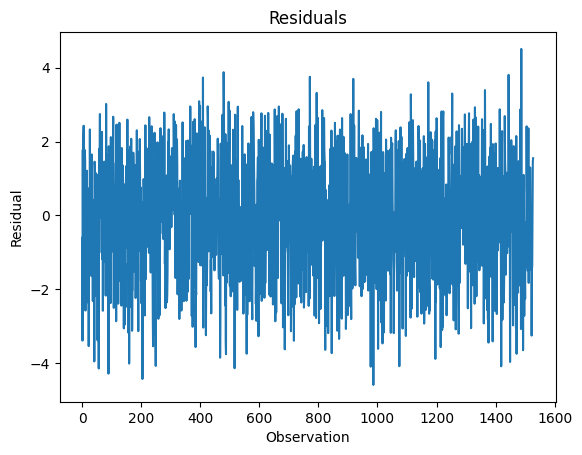

In [11]:
import time
with mlflow.start_run(log_system_metrics = True) as run:
    time.sleep(15)


    n_estimators = 99
    max_depth = 9
    max_features = 5

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

    mlflow.log_param("num_trees", n_estimators)
    mlflow.log_param("maxdepath", max_depth)
    mlflow.log_param("max_feat", max_features)

    predictions = rf.predict(X_test)
    # Define metric to use evaluate model
    mse = mean_squared_error(y_test, predictions)
    mlflow.log_metric("mse", mse)

    #Log the mode created by this run
    mlflow.sklearn.log_model(rf,"random_forest_model")
    
    savetxt("predictions.csv", predictions, delimiter=",")
    #Log the saved table as an artifacts

    mlflow.log_artifact("predictions.csv")

    # Convert the loss
    temp_df = pd.DataFrame(data=predictions- y_test)
    plt.plot(temp_df)
    plt.xlabel("Observation")
    plt.ylabel("Residual")
    plt.title("Residuals")

    plt.savefig("residuals_plot.png")
    mlflow.log_artifact("residuals_plot.png")

In [12]:

print(mlflow.MlflowClient().get_run(run.info.run_id).data)


<RunData: metrics={'mean_squared_error_X_test': 2.699597881991286,
 'mse': 2.699597881991286,
 'system/cpu_utilization_percentage': 20.5,
 'system/disk_available_megabytes': 229831.9,
 'system/disk_usage_megabytes': 764830.6,
 'system/disk_usage_percentage': 76.9,
 'system/network_receive_megabytes': 0.0010240000001431326,
 'system/network_transmit_megabytes': 0.013312000000041735,
 'system/system_memory_usage_megabytes': 6709.1,
 'system/system_memory_usage_percentage': 34.7,
 'training_mean_absolute_error': 0.5954313277812944,
 'training_mean_squared_error': 0.5565237125918688,
 'training_r2_score': 0.9359339903164908,
 'training_root_mean_squared_error': 0.7460051692795894,
 'training_score': 0.9359339903164908}, params={'bootstrap': 'True',
 'ccp_alpha': '0.0',
 'criterion': 'squared_error',
 'max_depth': '9',
 'max_feat': '5',
 'max_features': '5',
 'max_leaf_nodes': 'None',
 'max_samples': 'None',
 'maxdepath': '9',
 'min_impurity_decrease': '0.0',
 'min_samples_leaf': '1',
 'min

### Reset the experiment and Run

In [11]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [12]:
db = load_digits()
X = db.data
y = db.target
print("Shape X : ",X.shape)
print("Shape y : ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X :  (1797, 64)
Shape y :  (1797,)


In [13]:
experiment_name = "v2_logging_api"

In [14]:
experiment = mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    n_estimators = 110
    max_depth = 10
    max_features = 3

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

# Experiment Details
print("EXperiment id: {}".format(experiment.experiment_id))
print("Artifcats Location: {}".format(experiment.artifact_location)) 
print("Tags : {}".format(experiment.tags))
print("lifecycle_stage : {}".format(experiment.lifecycle_stage))

2025/03/02 00:12:25 INFO mlflow.tracking.fluent: Experiment with name 'v2_logging_api' does not exist. Creating a new experiment.
2025/03/02 00:12:25 WARNING mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics because initialization failed with error: `pyrsmi` is not installed, to log GPU metrics please run `pip install pyrsmi` to install it..
2025/03/02 00:12:25 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
Exception ignored in: <function ROCMMonitor.__del__ at 0x14646f1c0>
Traceback (most recent call last):
  File "/Users/tharhtet/.local/share/virtualenvs/8_Experiment_Tracking-keG3Bihs/lib/python3.10/site-packages/mlflow/system_metrics/metrics/rocm_monitor.py", line 119, in __del__
    rocml.smi_shutdown()
NameError: name 'rocml' is not defined
2025/03/02 00:12:27 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/03/02 00:12:27 INFO mlflow.system_metrics.system_metrics_monitor: Succ

🏃 View run trusting-finch-443 at: http://127.0.0.1:8080/#/experiments/2/runs/6b380d3f304c458ca3e24e812604d884
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/2
EXperiment id: 2
Artifcats Location: mlflow-artifacts:/2
Tags : {}
lifecycle_stage : active
